In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [15]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2016-07-01 00:00:00,-0.793193,0.419567,-0.732809
2016-07-01 00:00:01,-0.283949,1.283992,-1.301497
2016-07-01 00:00:02,-0.473157,1.012802,-2.098374
2016-07-01 00:00:03,-1.399598,-0.814812,-1.172802
2016-07-01 00:00:04,-0.321654,-0.519255,-0.568247


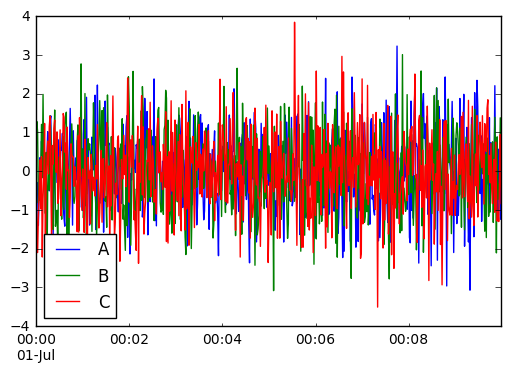

In [16]:
df.plot()

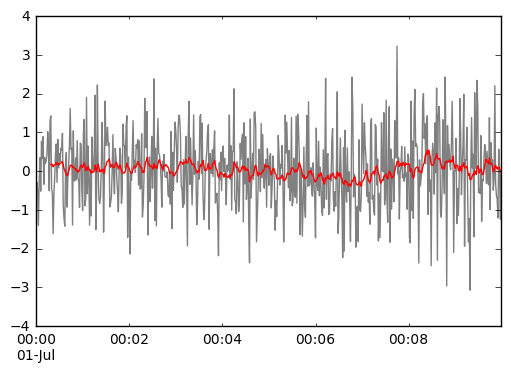

In [17]:
r = df.rolling(window = 20)
df['A'].plot(color='gray')
r.mean()['A'].plot(color='red')

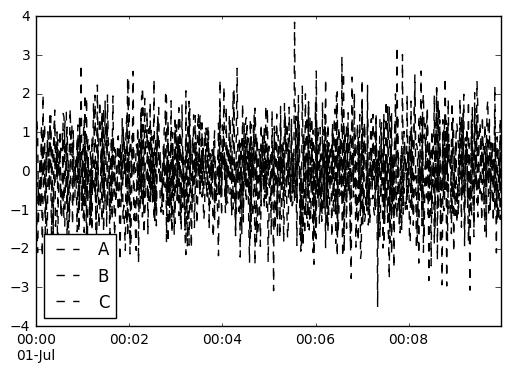

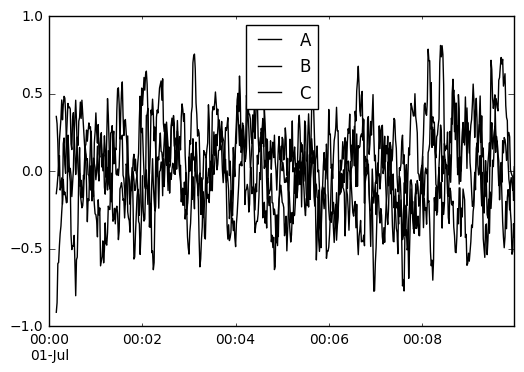

In [20]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [21]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(adjust=True,min_periods=2,ignore_na=False,span=15).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,-0.521596,0.880594,-1.036109
2016-07-01 00:00:02,-0.503252,0.930661,-1.438387
2016-07-01 00:00:03,-0.774007,0.403415,-1.358163
2016-07-01 00:00:04,-0.657922,0.166634,-1.155451
2016-07-01 00:00:05,-0.429728,-0.040804,-0.827146
2016-07-01 00:00:06,-0.447055,-0.057652,-0.857095
2016-07-01 00:00:07,-0.214771,0.183602,-0.622548
2016-07-01 00:00:08,-0.118298,0.120878,-0.906908
2016-07-01 00:00:09,0.053389,0.436576,-0.872797


In [22]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [23]:
df.head()

,A,B,C,D
2016-06-06,1.187474,0.829459,-0.534777,-0.690965
2016-06-07,0.616289,0.537864,0.217613,-0.047831
2016-06-08,-0.572220,1.486536,1.316507,0.767307
2016-06-09,0.482418,-1.421663,0.020210,-0.262488
2016-06-10,-0.449235,0.703787,-0.161501,0.153618


array([<matplotlib.axes._subplots.AxesSubplot object at 0x110c203c8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x110edce80>], dtype=object)

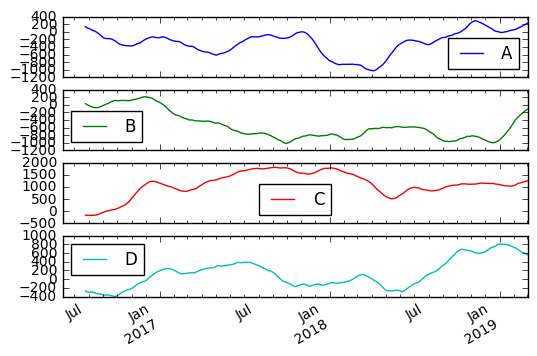

In [24]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [25]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.785661,0.657833,0.648996,1.832747


In [30]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,1.495618,1.098391,-0.425971,-0.714881
2016-06-08,1.407593,1.683547,0.049134,-0.467083
2016-06-09,1.484185,1.620709,0.291739,-0.408807
2016-06-10,1.440293,1.723764,0.405001,-0.343117


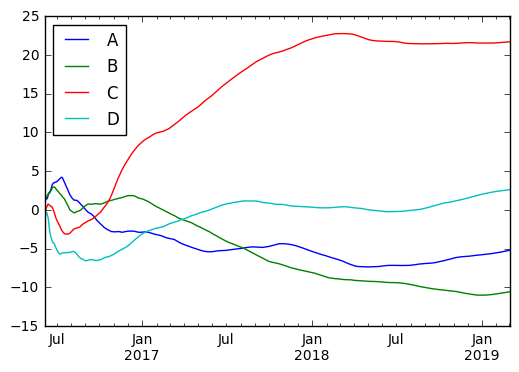

In [32]:
df.expanding(min_periods = 1).mean().plot()

In [33]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?
# An expanding window will be more stable because it is the lifetime average of the data
# One might use one over the other when looking at more recent data and do not want to put equal weight to all points in time

In [34]:
# EWMA
# Why use EWMA?
# EWMA (Exponentially Weighted Moving Average) is good for when you do not want to 
# lose all the information in previous times, and do not want to put equal weight to them either.
# It is useful as a smoothing function 

In [35]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [36]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

In [40]:
from pandas_datareader import data as web
start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2013-1-27')
f = web.DataReader("F", 'yahoo', start, end)

In [41]:
f.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,10.17,10.28,10.05,10.28,60855800,8.418735
2010-01-05,10.45,11.24,10.40,10.96,215620200,8.975616
2010-01-06,11.21,11.46,11.13,11.37,200070600,9.311383
2010-01-07,11.46,11.69,11.32,11.66,130201700,9.548876
2010-01-08,11.67,11.74,11.46,11.69,130463000,9.573444


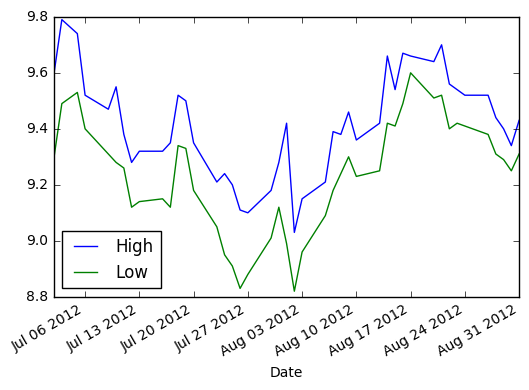

In [44]:
# Find highs and lows for July and August only
f['2012-07':'2012-08'][['High', 'Low']].plot()

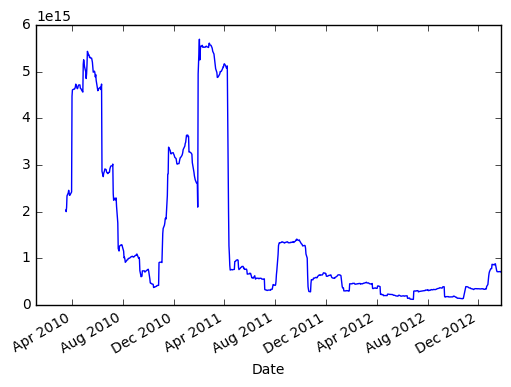

In [45]:
# Is the variance of the trading volume relatively stable over time?
r = f.rolling(50).var()['Volume'].plot()

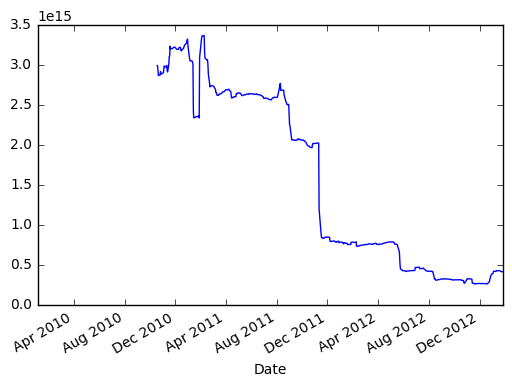

In [47]:
r = f.rolling(200).var()['Volume'].plot()

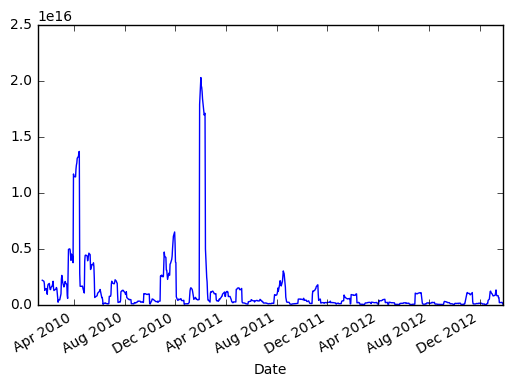

In [48]:
r = f.rolling(10).var()['Volume'].plot()

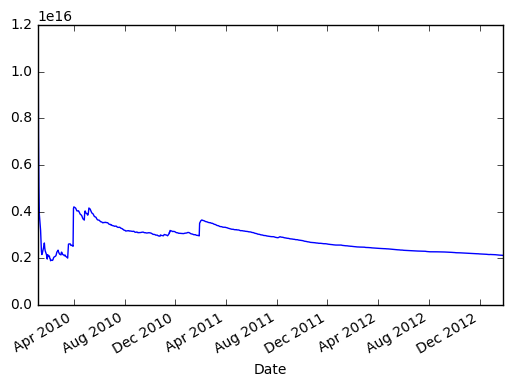

In [49]:
r = f.expanding().var()['Volume'].plot()

In [55]:
# On how many days did the stock close higher than it opened?
len(f[f.Close > f.Open])

352

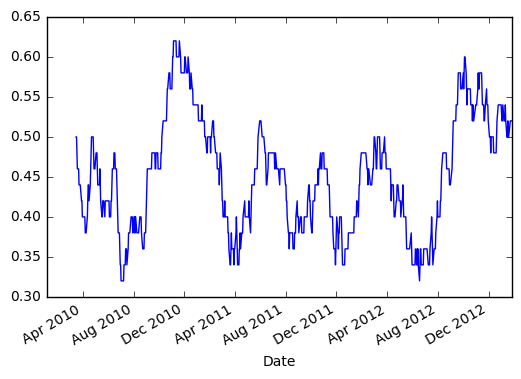

In [58]:
# Did the 'up' days become more or less frequent over time?
f['DayGain'] = f.Close - f.Open
f.rolling(window=50)['DayGain'].apply(lambda x: len([x_i for x_i in x if x_i > 0])/len(x)).plot()

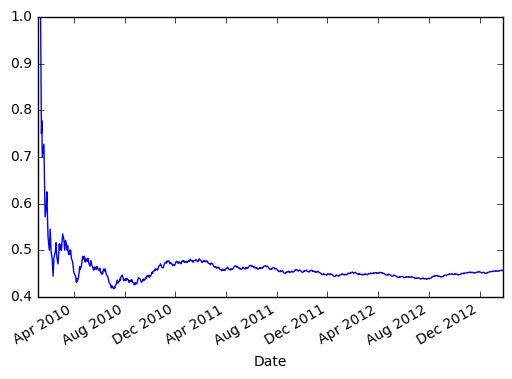

In [59]:
f.expanding()['DayGain'].apply(lambda x: len([x_i for x_i in x if x_i > 0])/len(x)).plot()

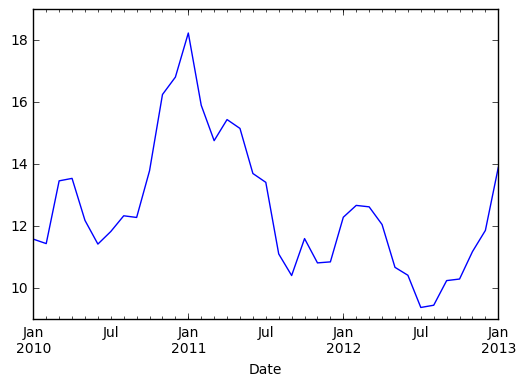

In [62]:
# Compute and plot the mean monthly high value of the stock
f.resample('M')['High'].mean().plot()

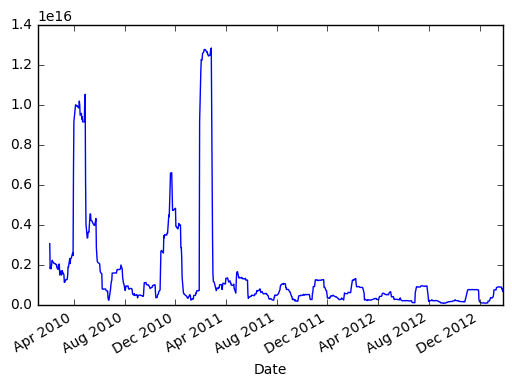

In [63]:
# Explore the variance of the differenced volume
volume = f.Volume
volume_lagged = f.Volume.shift()
diffed_volume = volume - volume_lagged
diffed_volume.rolling(window=20).var().plot()

In [64]:
# Does the lagged time series correlate with itself?
pd.DataFrame({'real':f.Volume, 'lagged':f.Volume.shift()}).corr()

,lagged,real
lagged,1.000000,0.656441
real,0.656441,1.000000
